<a href="https://colab.research.google.com/github/morai8/ML_Case_Based_1/blob/main/TugasML_AuditRisk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns #nampilih diagram
import matplotlib.pyplot as plt
from sklearn.utils import resample


#Melakukan pembacaan file audit_risk.csv

In [2]:
df = pd.read_csv("https://github.com/morai8/ML_Case_Based_1/blob/b984e31a955704673d93e8c848b4e4bb97ffe220/audit_risk.csv?raw=true")

In [3]:
df

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,55.57,9,0.49,0.2,0.098,0.40,0.2,0.080,0.89,5.0,...,0.4,0,0.2,0.0,2.0,1.578,0.4,0.5,0.3156,0
772,55.57,16,0.47,0.2,0.094,0.37,0.2,0.074,0.84,5.0,...,0.4,0,0.2,0.0,2.0,1.568,0.4,0.5,0.3136,0
773,55.57,14,0.24,0.2,0.048,0.04,0.2,0.008,0.28,5.0,...,0.4,0,0.2,0.0,2.0,1.456,0.4,0.5,0.2912,0
774,55.57,18,0.20,0.2,0.040,0.00,0.2,0.000,0.20,5.0,...,0.4,0,0.2,0.0,2.0,1.440,0.4,0.5,0.2880,0


#LOCATION_ID bertipe data object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   LOCATION_ID     776 non-null    object 
 2   PARA_A          776 non-null    float64
 3   Score_A         776 non-null    float64
 4   Risk_A          776 non-null    float64
 5   PARA_B          776 non-null    float64
 6   Score_B         776 non-null    float64
 7   Risk_B          776 non-null    float64
 8   TOTAL           776 non-null    float64
 9   numbers         776 non-null    float64
 10  Score_B.1       776 non-null    float64
 11  Risk_C          776 non-null    float64
 12  Money_Value     775 non-null    float64
 13  Score_MV        776 non-null    float64
 14  Risk_D          776 non-null    float64
 15  District_Loss   776 non-null    int64  
 16  PROB            776 non-null    float64
 17  RiSk_E          776 non-null    flo

In [5]:
df["LOCATION_ID"]

0      23
1       6
2       6
3       6
4       6
       ..
771     9
772    16
773    14
774    18
775    15
Name: LOCATION_ID, Length: 776, dtype: object

#Melakukan drop pada column LOCATION_ID

In [6]:
df = df.drop('LOCATION_ID', axis=1)

In [7]:
df

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,0.2,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,0.2,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,0.6,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,0.2,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,55.57,0.49,0.2,0.098,0.40,0.2,0.080,0.89,5.0,0.2,...,0.4,0,0.2,0.0,2.0,1.578,0.4,0.5,0.3156,0
772,55.57,0.47,0.2,0.094,0.37,0.2,0.074,0.84,5.0,0.2,...,0.4,0,0.2,0.0,2.0,1.568,0.4,0.5,0.3136,0
773,55.57,0.24,0.2,0.048,0.04,0.2,0.008,0.28,5.0,0.2,...,0.4,0,0.2,0.0,2.0,1.456,0.4,0.5,0.2912,0
774,55.57,0.20,0.2,0.040,0.00,0.2,0.000,0.20,5.0,0.2,...,0.4,0,0.2,0.0,2.0,1.440,0.4,0.5,0.2880,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   PARA_A          776 non-null    float64
 2   Score_A         776 non-null    float64
 3   Risk_A          776 non-null    float64
 4   PARA_B          776 non-null    float64
 5   Score_B         776 non-null    float64
 6   Risk_B          776 non-null    float64
 7   TOTAL           776 non-null    float64
 8   numbers         776 non-null    float64
 9   Score_B.1       776 non-null    float64
 10  Risk_C          776 non-null    float64
 11  Money_Value     775 non-null    float64
 12  Score_MV        776 non-null    float64
 13  Risk_D          776 non-null    float64
 14  District_Loss   776 non-null    int64  
 15  PROB            776 non-null    float64
 16  RiSk_E          776 non-null    float64
 17  History         776 non-null    int

In [9]:
df.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,...,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,...,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


#menampilkan 3 data paling atas

In [10]:
df.head(3)

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,0.2,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,0.2,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0


#menampilkan 3 data paling bawah

In [11]:
df.tail(3)

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
773,55.57,0.24,0.2,0.048,0.04,0.2,0.008,0.28,5.0,0.2,...,0.4,0,0.2,0.0,2.0,1.456,0.4,0.5,0.2912,0
774,55.57,0.20,0.2,0.040,0.00,0.2,0.000,0.20,5.0,0.2,...,0.4,0,0.2,0.0,2.0,1.440,0.4,0.5,0.2880,0
775,55.57,0.00,0.2,0.000,0.00,0.2,0.000,0.00,5.0,0.2,...,0.4,0,0.2,0.0,2.0,1.464,0.4,0.5,0.2928,0


#menampilkan 3 data random

In [14]:
df.sample(3)

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
150,3.41,1.08,0.4,0.432,32.71,0.6,19.626,33.79,5.0,0.2,...,0.4,0,0.2,0.0,3.6,24.810,0.4,0.5,4.9620,1
325,2.37,7.59,0.6,4.554,1.47,0.4,0.588,9.06,5.5,0.4,...,1.2,0,0.2,0.0,4.2,30.316,1.2,0.5,18.1896,1
759,55.57,0.84,0.2,0.168,0.65,0.2,0.130,1.49,5.0,0.2,...,0.4,0,0.2,0.0,2.0,1.698,0.4,0.5,0.3396,0


In [15]:
df.shape

(776, 26)

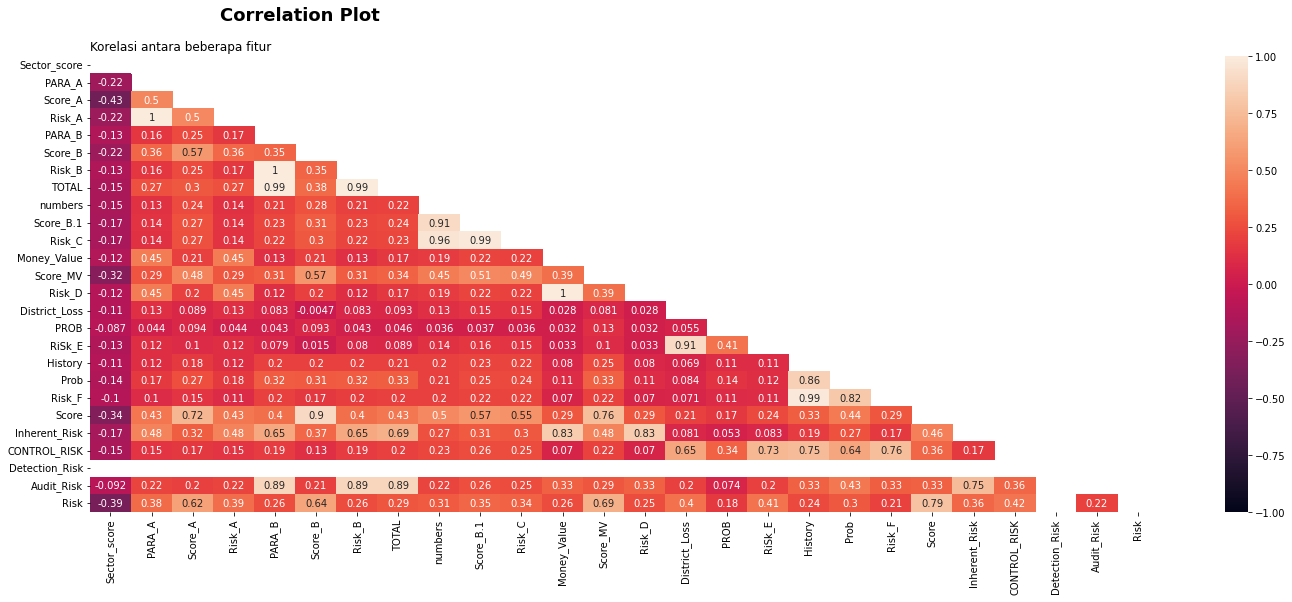

In [16]:
fig, ax = plt.subplots(figsize=(20, 8))

mask = np.triu(np.ones_like(df.corr(), dtype=bool))

heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True)

plt.suptitle("Correlation Plot", ha='left', x=0.155, y=1.04, fontsize=18, fontweight='bold')
plt.title("Korelasi antara beberapa fitur", loc='left', fontsize=12) 
plt.tight_layout()
plt.show()

In [18]:
#menghapus kolom yang korelasi rendah dengan kolom target dengan nilai korealsi -0.3 - 0.3 (karena nilai korelasi tsb lemah sekali)
hapus = ["Sector_score","PARA_B","Risk_B","TOTAL","numbers","Risk_C","Money_Value","Risk_D","PROB","History","Prob","Risk_F","Audit_Risk"]#menghapus atribut

In [19]:
df = df.drop(hapus, axis=1)

In [20]:
df

,PARA_A,Score_A,Risk_A,Score_B,Score_B.1,Score_MV,District_Loss,RiSk_E,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Risk
0,4.18,0.6,2.508,0.2,0.2,0.2,2,0.4,2.4,8.574,0.4,0.5,1
1,0.00,0.2,0.000,0.2,0.2,0.2,2,0.4,2.0,2.554,0.4,0.5,0
2,0.51,0.2,0.102,0.2,0.2,0.2,2,0.4,2.0,1.548,0.4,0.5,0
3,0.00,0.2,0.000,0.6,0.6,0.6,2,0.4,4.4,17.530,0.4,0.5,1
4,0.00,0.2,0.000,0.2,0.2,0.2,2,0.4,2.0,1.416,0.4,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,0.49,0.2,0.098,0.2,0.2,0.2,2,0.4,2.0,1.578,0.4,0.5,0
772,0.47,0.2,0.094,0.2,0.2,0.2,2,0.4,2.0,1.568,0.4,0.5,0
773,0.24,0.2,0.048,0.2,0.2,0.2,2,0.4,2.0,1.456,0.4,0.5,0
774,0.20,0.2,0.040,0.2,0.2,0.2,2,0.4,2.0,1.440,0.4,0.5,0


#Pembuatan histogram

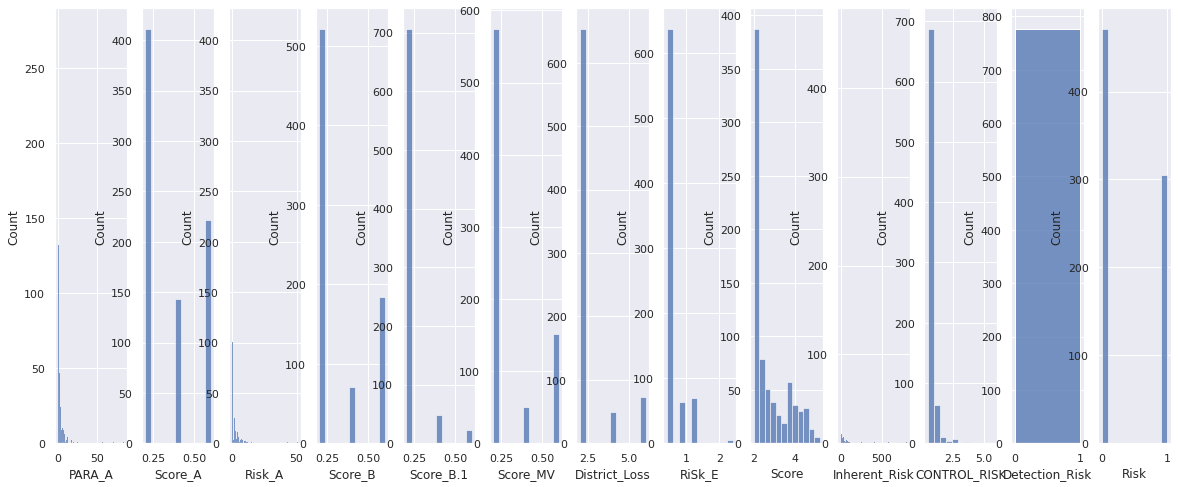

In [34]:
fig, axs = plt.subplots(ncols=13)
sns.set(rc={'figure.figsize':(15,8)}) #15,8
counter = 0
for i in df:
  sns.histplot(df[i], ax=axs[counter])
  counter= counter+1


#menampilan jumlah nilai 0 dan 1 pada risk

0    471
1    305
Name: Risk, dtype: int64


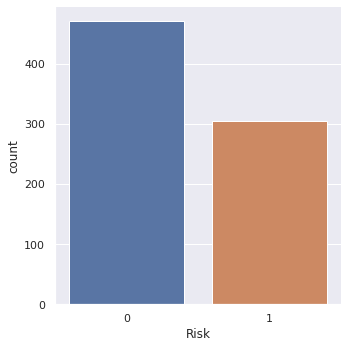

In [35]:
print(df['Risk'].value_counts())
sns.catplot(x='Risk', data=df, kind='count')
plt.show()

#code untuk melakukan oversampling

In [37]:
#oversampling 0 dan 1

#create two different dataframe of majority and minority class 
df_majority = df[(df['Risk']==0)] 
df_minority = df[(df['Risk']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 471, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

1    471
0    471
Name: Risk, dtype: int64


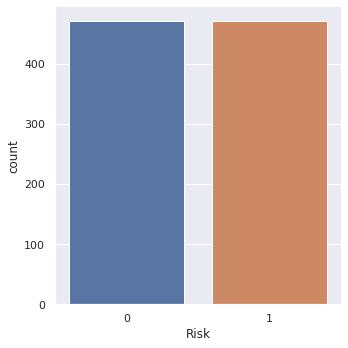

In [38]:
print(df_upsampled['Risk'].value_counts())
sns.catplot(x='Risk', data=df_upsampled, kind='count')
plt.show()

#menampilkan boxplot

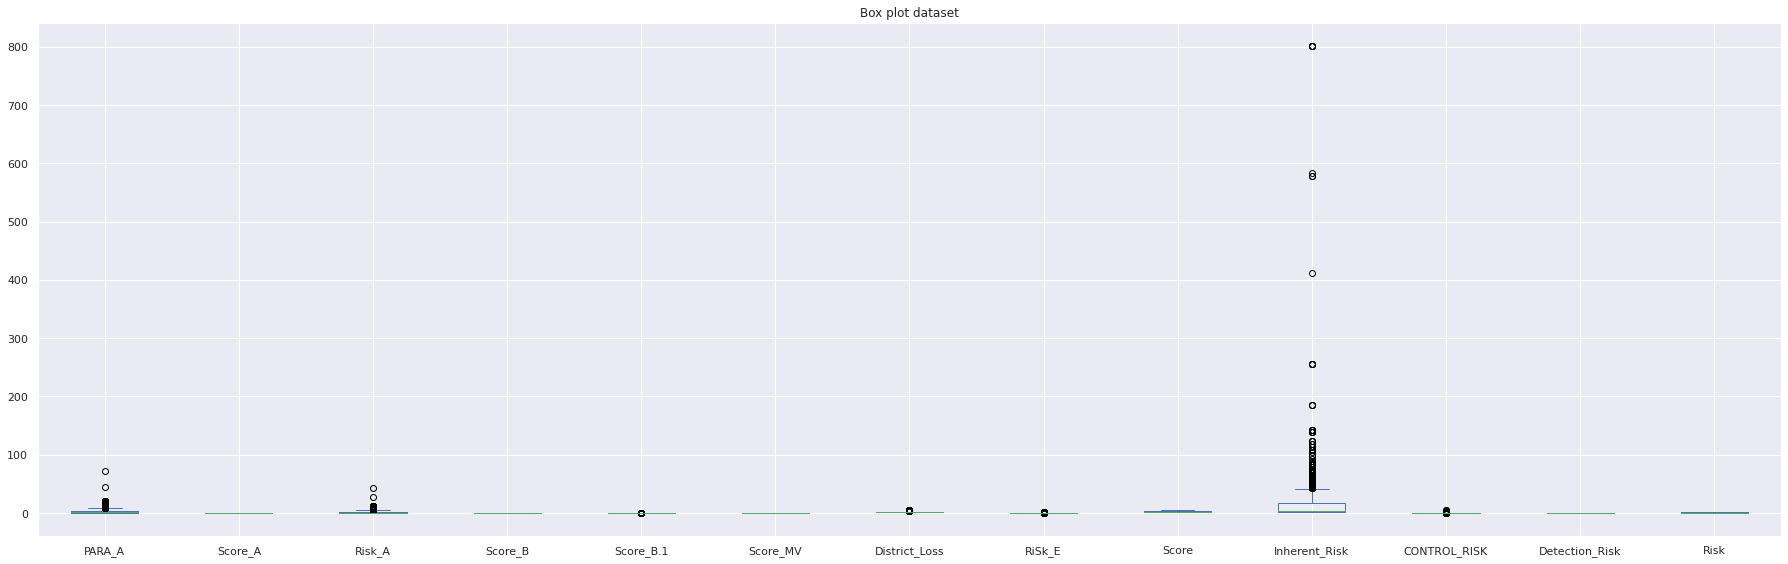

In [39]:
plt.rcParams["figure.figsize"] = [25, 8]
plt.rcParams["figure.autolayout"] = True
ax = df_upsampled[df_upsampled.columns].plot(kind='box', title='Box plot dataset')


#function hitung outliers

In [40]:
def hitungOutliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

outliers = hitungOutliers(df["PARA_A"])
percentage = len(outliers)/len(df["PARA_A"])*100
print("number of outliers: " + str(len(outliers)))
print("max outlier value: " + str(outliers.max()))
print("min outlier value: " + str(outliers.min()))
print("Outliers percentage: "+ str(float(f'{percentage:.2f}'))+"%")

number of outliers: 82
max outlier value: 85.0
min outlier value: 5.9
Outliers percentage: 10.57%


In [41]:
outliers = hitungOutliers(df["Risk_A"])
percentage = len(outliers)/len(df["Risk_A"])*100
print("number of outliers: " + str(len(outliers)))
print("max outlier value: " + str(outliers.max()))
print("min outlier value: " + str(outliers.min()))
print("Outliers percentage: "+ str(float(f'{percentage:.2f}'))+"%")

number of outliers: 80
max outlier value: 51.0
min outlier value: 3.756
Outliers percentage: 10.31%


In [42]:
outliers = hitungOutliers(df["Score_B.1"])
percentage = len(outliers)/len(df["Score_B.1"])*100
print("number of outliers: " + str(len(outliers)))
print("max outlier value: " + str(outliers.max()))
print("min outlier value: " + str(outliers.min()))
print("Outliers percentage: "+ str(float(f'{percentage:.2f}'))+"%")

number of outliers: 70
max outlier value: 0.6
min outlier value: 0.4
Outliers percentage: 9.02%


In [43]:
outliers = hitungOutliers(df["District_Loss"])
percentage = len(outliers)/len(df["District_Loss"])*100
print("number of outliers: " + str(len(outliers)))
print("max outlier value: " + str(outliers.max()))
print("min outlier value: " + str(outliers.min()))
print("Outliers percentage: "+ str(float(f'{percentage:.2f}'))+"%")

number of outliers: 123
max outlier value: 6
min outlier value: 4
Outliers percentage: 15.85%


In [44]:
outliers = hitungOutliers(df["RiSk_E"])
percentage = len(outliers)/len(df["RiSk_E"])*100
print("number of outliers: " + str(len(outliers)))
print("max outlier value: " + str(outliers.max()))
print("min outlier value: " + str(outliers.min()))
print("Outliers percentage: "+ str(float(f'{percentage:.2f}'))+"%")

number of outliers: 139
max outlier value: 2.4
min outlier value: 0.8
Outliers percentage: 17.91%


In [45]:
outliers = hitungOutliers(df["CONTROL_RISK"])
percentage = len(outliers)/len(df["CONTROL_RISK"])*100
print("number of outliers: " + str(len(outliers)))
print("max outlier value: " + str(outliers.max()))
print("min outlier value: " + str(outliers.min()))
print("Outliers percentage: "+ str(float(f'{percentage:.2f}'))+"%")

number of outliers: 174
max outlier value: 5.8
min outlier value: 0.8
Outliers percentage: 22.42%


#Karena semua nilai outliernya lebih dari 10%,maka nilai outlier diabaikan saja

In [46]:
df_upsampled.shape

(942, 13)

#mengecek kolom yang memiliki nilai 1 jenis

In [47]:
col1len = []
for col in df_upsampled:
    if (len(df[col].unique()) == 1):
      col1len.append(col)
print(col1len)

['Detection_Risk']


In [48]:
df = df_upsampled.drop('Detection_Risk', axis=1)


In [49]:
def minMaxScaling(df) :
    return (df.iloc[:,:13] - df.iloc[:,:13].min()) / (df.iloc[:,:13].max() - df.iloc[:,:13].min())
dataNormalized = minMaxScaling(df)

In [50]:
dataNormalized

,PARA_A,Score_A,Risk_A,Score_B,Score_B.1,Score_MV,District_Loss,RiSk_E,Score,Inherent_Risk,CONTROL_RISK,Risk
150,0.015109,0.5,0.010073,1.0,0.0,0.5,0.0,0.0,0.5000,0.029268,0.000000,1.0
494,0.288892,1.0,0.288892,0.0,1.0,1.0,1.0,0.4,0.6875,0.318275,0.222222,1.0
154,0.016088,0.5,0.010726,1.0,1.0,1.0,0.0,0.0,0.8125,0.034994,0.000000,1.0
119,0.018886,0.5,0.012591,1.0,0.5,1.0,0.0,0.0,0.8125,0.074548,0.333333,1.0
285,0.026581,0.5,0.017721,1.0,0.0,0.5,0.0,0.0,0.5625,0.011730,0.074074,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
771,0.006855,0.0,0.002285,0.0,0.0,0.0,0.0,0.0,0.0000,0.000223,0.000000,0.0
772,0.006575,0.0,0.002192,0.0,0.0,0.0,0.0,0.0,0.0000,0.000210,0.000000,0.0
773,0.003358,0.0,0.001119,0.0,0.0,0.0,0.0,0.0,0.0000,0.000070,0.000000,0.0
774,0.002798,0.0,0.000933,0.0,0.0,0.0,0.0,0.0,0.0000,0.000050,0.000000,0.0


In [51]:
dataNormalized.reset_index()

,index,PARA_A,Score_A,Risk_A,Score_B,Score_B.1,Score_MV,District_Loss,RiSk_E,Score,Inherent_Risk,CONTROL_RISK,Risk
0,150,0.015109,0.5,0.010073,1.0,0.0,0.5,0.0,0.0,0.5000,0.029268,0.000000,1.0
1,494,0.288892,1.0,0.288892,0.0,1.0,1.0,1.0,0.4,0.6875,0.318275,0.222222,1.0
2,154,0.016088,0.5,0.010726,1.0,1.0,1.0,0.0,0.0,0.8125,0.034994,0.000000,1.0
3,119,0.018886,0.5,0.012591,1.0,0.5,1.0,0.0,0.0,0.8125,0.074548,0.333333,1.0
4,285,0.026581,0.5,0.017721,1.0,0.0,0.5,0.0,0.0,0.5625,0.011730,0.074074,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,771,0.006855,0.0,0.002285,0.0,0.0,0.0,0.0,0.0,0.0000,0.000223,0.000000,0.0
938,772,0.006575,0.0,0.002192,0.0,0.0,0.0,0.0,0.0,0.0000,0.000210,0.000000,0.0
939,773,0.003358,0.0,0.001119,0.0,0.0,0.0,0.0,0.0,0.0000,0.000070,0.000000,0.0
940,774,0.002798,0.0,0.000933,0.0,0.0,0.0,0.0,0.0,0.0000,0.000050,0.000000,0.0


In [52]:
dataNormalized.shape

(942, 12)

#Menampilkan boxplot yang outliernya sudah dimepetkan

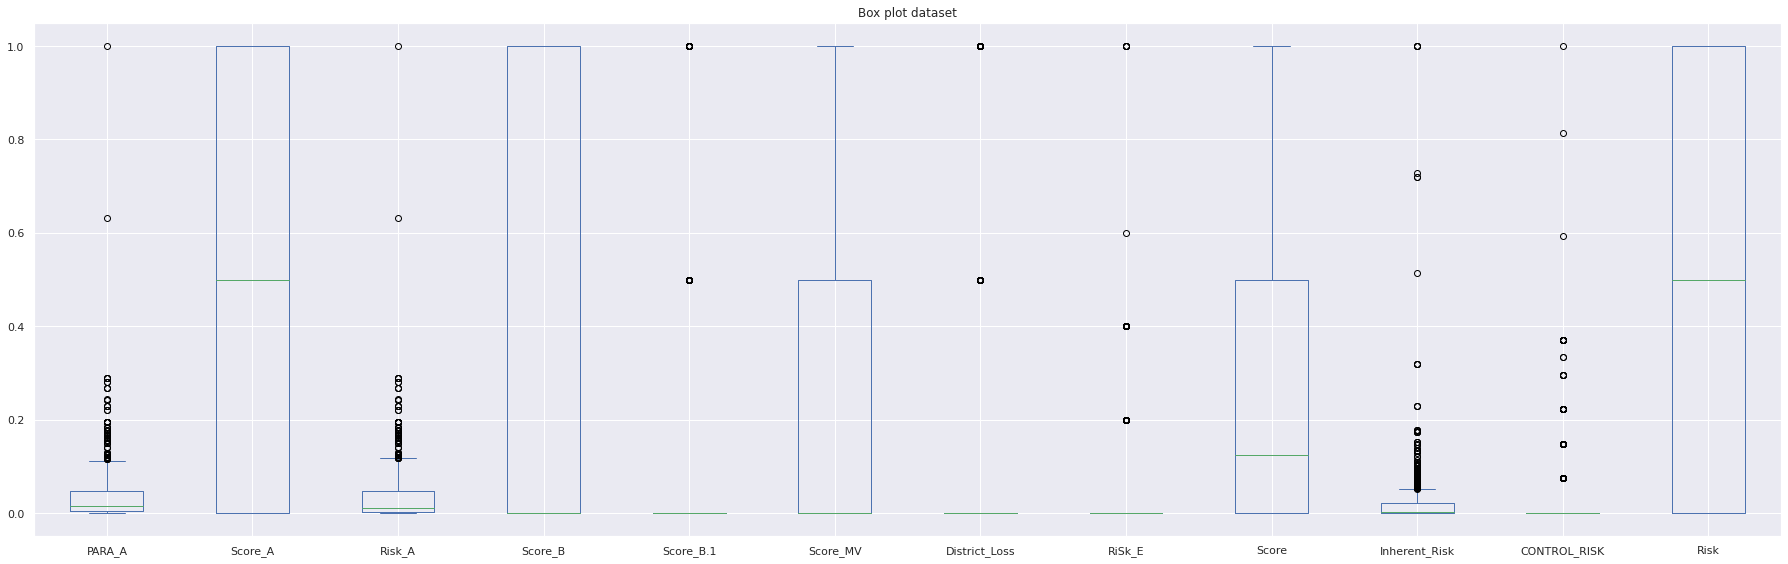

In [53]:
plt.rcParams["figure.figsize"] = [25, 8]
plt.rcParams["figure.autolayout"] = True
ax = dataNormalized[dataNormalized.columns].plot(kind='box', title='Box plot dataset')